# Data Cleaning and EDA
<hr>

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

from nltk.corpus import stopwords

pd.options.display.max_colwidth = 100

In [2]:
anxi = pd.read_csv("../raw_data/raw_reddit_anxiety.csv")
depr = pd.read_csv("../raw_data/raw_reddit_depression.csv")

In [3]:
anxi.isnull().sum()

id            0
subreddit     0
date          0
title         0
text         27
dtype: int64

In [4]:
depr.isnull().sum()

id           0
subreddit    0
date         0
title        0
text         0
dtype: int64

In [5]:
# Drop rows containing null values
anxi.dropna(inplace=True)
depr.dropna(inplace=True)

In [6]:
print(f"Anxiety Rows: {anxi.shape[0]}")
print(f"Depression Rows: {depr.shape[0]}")
print(f'Total: {anxi.shape[0] + depr.shape[0]}')

Anxiety Rows: 1897
Depression Rows: 2334
Total: 4231


In [7]:
# Change date column to type datetime
anxi["date"] = pd.to_datetime(anxi["date"])
depr["date"] = pd.to_datetime(depr["date"])

In [8]:
anxi.dtypes, depr.dtypes

(id                   object
 subreddit            object
 date         datetime64[ns]
 title                object
 text                 object
 dtype: object,
 id                   object
 subreddit            object
 date         datetime64[ns]
 title                object
 text                 object
 dtype: object)

In [9]:
# Capitalize the subreddit name
depr['subreddit'] = depr['subreddit'].replace({'depression':'Depression'})

In [10]:
# Merge subreddit dataframes
df = pd.concat([anxi, depr])

In [11]:
anxi.to_csv("../clean_data/clean_reddit_anxiety.csv", index=False)
depr.to_csv("../clean_data/clean_reddit_depression.csv", index=False)
df.to_csv("../clean_data/clean_combined.csv", index=False)

In [12]:
# Made a function to create a word count and length column for title and text columns
def post_count_length(df):
    df["text_word_count"] = [len(text.split()) for text in df["text"]]
    df["title_word_count"] = [len(title.split()) for title in df["title"]]
    df["text_length"] = [len(text) for text in df["text"]]
    df["title_length"] = [len(title) for title in df["title"]]
    return df

In [13]:
post_count_length(anxi)
post_count_length(depr)
post_count_length(df).head(1)

,id,subreddit,date,title,text,text_word_count,title_word_count,text_length,title_length
0,191gvk9,Anxiety,2024-01-08,Prion disease anxiety update,"I finally got my CBC results back and it was pretty normal, even my urinalysis. The only thing t...",68,4,402,28


---
## EDA

In [14]:
anxi["title_word_count"].mean(), depr["title_word_count"].mean()

(7.030555555555556, 6.974839087185488)

In [15]:
anxi["title_length"].mean(), depr["title_length"].mean()

(39.93611111111111, 35.63662960795787)

In [16]:
anxi["text_word_count"].mean(), depr["text_word_count"].mean()

(162.88611111111112, 189.51550614394384)

In [17]:
anxi["text_length"].mean(), depr["text_length"].mean()

(862.2673611111111, 979.284961966062)

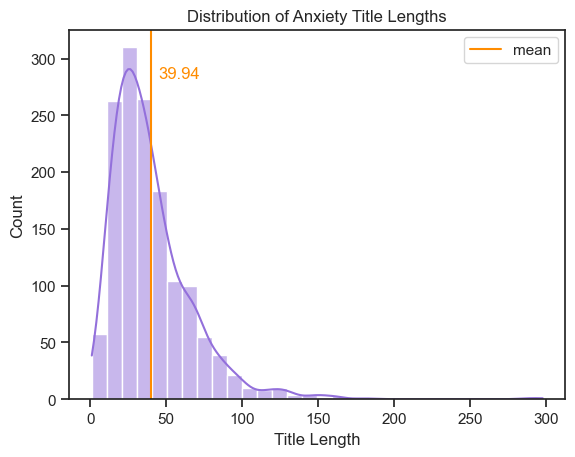

In [18]:
sns.set(style="ticks")
sns.histplot(anxi["title_length"], bins=30, kde=True, color="mediumpurple")
plt.axvline(anxi["title_length"].mean(), label="mean", color="darkorange")
plt.title("Distribution of Anxiety Title Lengths")
plt.xlabel("Title Length")
plt.text(
    x=0.18,
    y=0.9,
    s=round(anxi["title_length"].mean(), 2),
    ha="left",
    va="top",
    color="darkorange",
    transform=plt.gca().transAxes,
)
plt.legend()
plt.savefig("../images/anxiety_title_lengths.png", bbox_inches="tight")

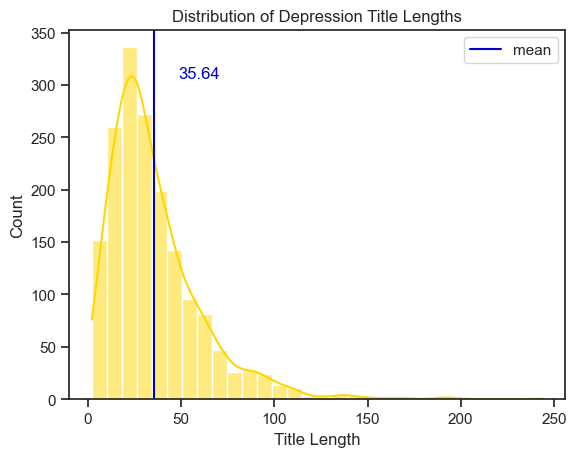

In [19]:
sns.set(style="ticks")
sns.histplot(depr["title_length"], bins=30, kde=True, color="gold")
plt.axvline(depr["title_length"].mean(), label="mean", color="mediumblue")
plt.title("Distribution of Depression Title Lengths")
plt.xlabel("Title Length")
plt.text(
    x=0.22,
    y=0.9,
    s=round(depr["title_length"].mean(), 2),
    ha="left",
    va="top",
    color="mediumblue",
    transform=plt.gca().transAxes,
)
plt.legend()
plt.savefig("../images/depression_title_lengths.png", bbox_inches="tight")

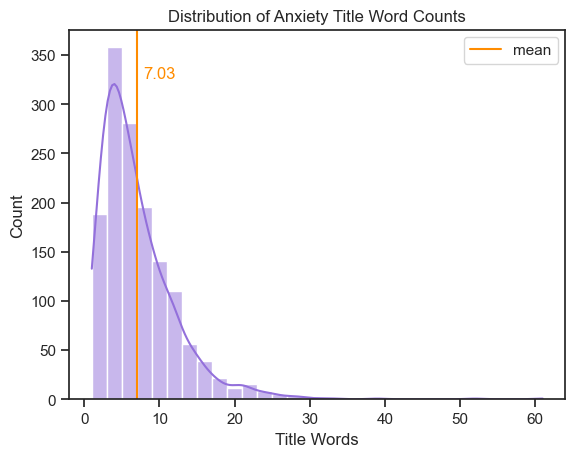

In [20]:
sns.set(style="ticks")
sns.histplot(anxi["title_word_count"], bins=30, kde=True, color="mediumpurple")
plt.axvline(anxi["title_word_count"].mean(), label="mean", color="darkorange")
plt.title("Distribution of Anxiety Title Word Counts")
plt.xlabel("Title Words")
plt.text(
    x=0.15,
    y=0.9,
    s=round(anxi["title_word_count"].mean(), 2),
    ha="left",
    va="top",
    color="darkorange",
    transform=plt.gca().transAxes,
)
plt.legend()
plt.savefig("../images/anxiety_word_counts.png", bbox_inches="tight")

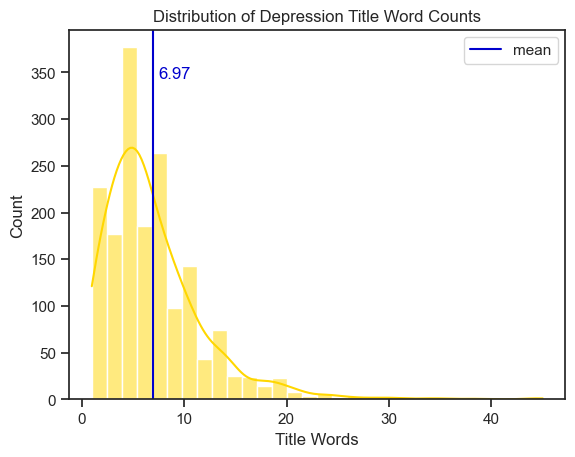

In [21]:
sns.set(style="ticks")
sns.histplot(depr["title_word_count"], bins=30, kde=True, color="gold")
plt.axvline(depr["title_word_count"].mean(), label="mean", color="mediumblue")
plt.title("Distribution of Depression Title Word Counts")
plt.xlabel("Title Words")
plt.text(
    x=0.18,
    y=0.9,
    s=round(depr["title_word_count"].mean(), 2),
    ha="left",
    va="top",
    color="mediumblue",
    transform=plt.gca().transAxes,
)
plt.legend()
plt.savefig("../images/depression_word_counts.png", bbox_inches="tight")

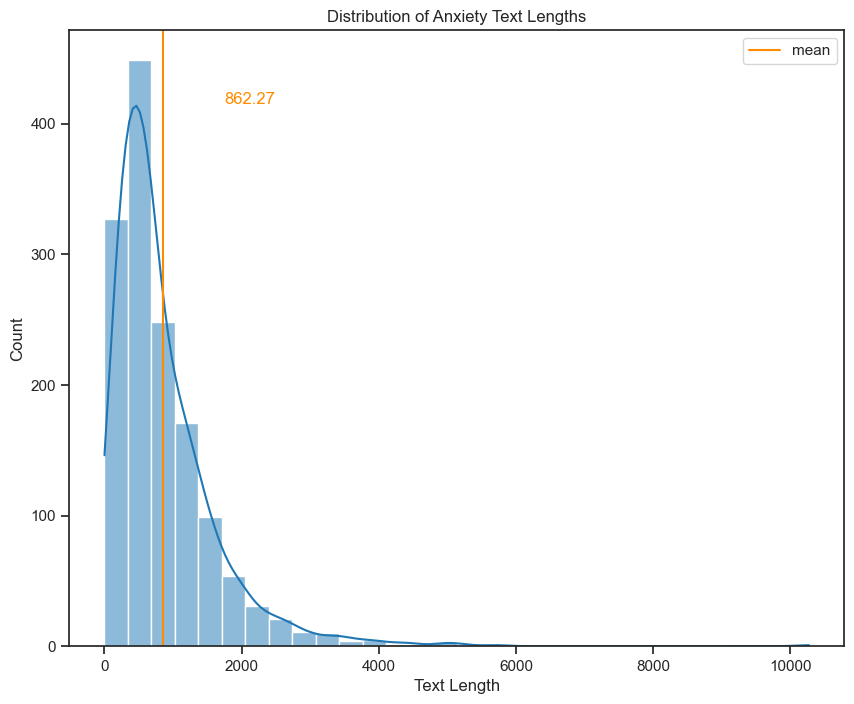

In [22]:
plt.figure(figsize=(10, 8))
sns.set(style="ticks")
sns.histplot(anxi["text_length"], bins=30, kde=True, color="#1f77b4")
plt.axvline(anxi["text_length"].mean(), label="mean", color="darkorange")
plt.title("Distribution of Anxiety Text Lengths")
plt.xlabel("Text Length")
plt.text(
    x=0.2,
    y=0.9,
    s=round(anxi["text_length"].mean(), 2),
    ha="left",
    va="top",
    color="darkorange",
    transform=plt.gca().transAxes,
)
plt.legend()
plt.savefig("../images/anxiety_text_lengths.png", bbox_inches="tight")

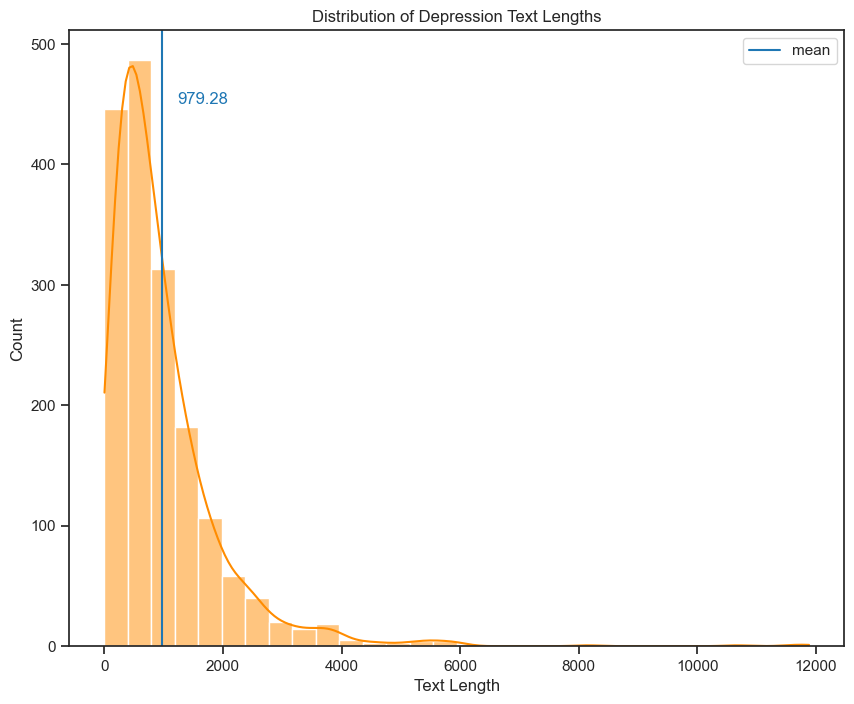

In [23]:
plt.figure(figsize=(10, 8))
sns.set(style="ticks")
sns.histplot(depr["text_length"], bins=30, kde=True, color="darkorange")
plt.axvline(depr["text_length"].mean(), label="mean", color="#1f77b4")
plt.title("Distribution of Depression Text Lengths")
plt.xlabel("Text Length")
plt.text(
    x=0.14,
    y=0.9,
    s=round(depr["text_length"].mean(), 2),
    ha="left",
    va="top",
    color="#1f77b4",
    transform=plt.gca().transAxes,
)
plt.legend()
plt.savefig("../images/depression_text_lengths.png", bbox_inches="tight")

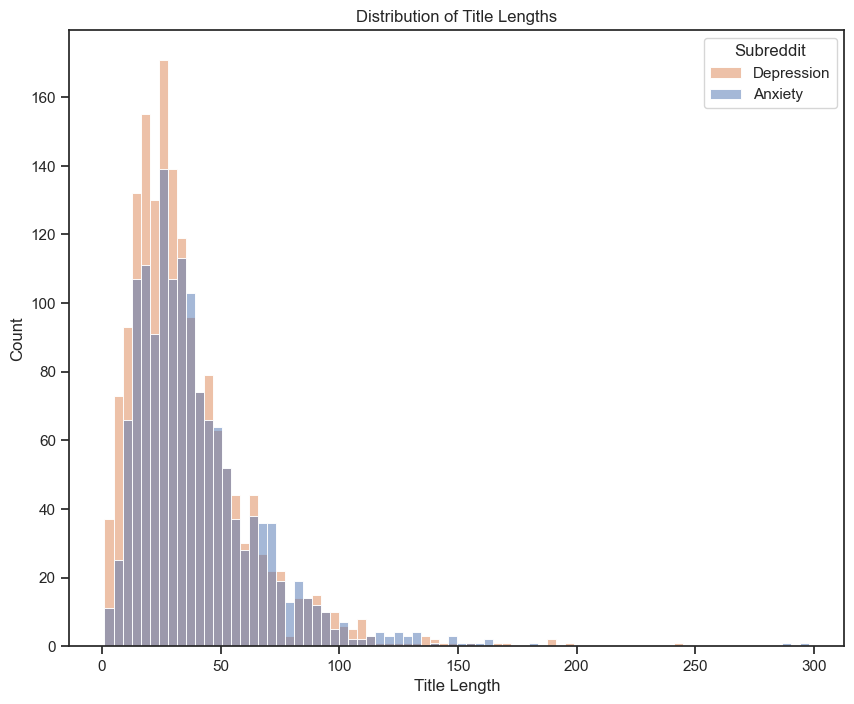

In [24]:
plt.figure(figsize=(10, 8))
sns.set(style="ticks")
sns.histplot(data=df, x="title_length", hue="subreddit")
plt.title("Distribution of Title Lengths")
plt.xlabel("Title Length")
plt.legend(title="Subreddit", labels=["Depression", "Anxiety"])
plt.savefig("../images/combined_title_lengths.png", bbox_inches="tight")

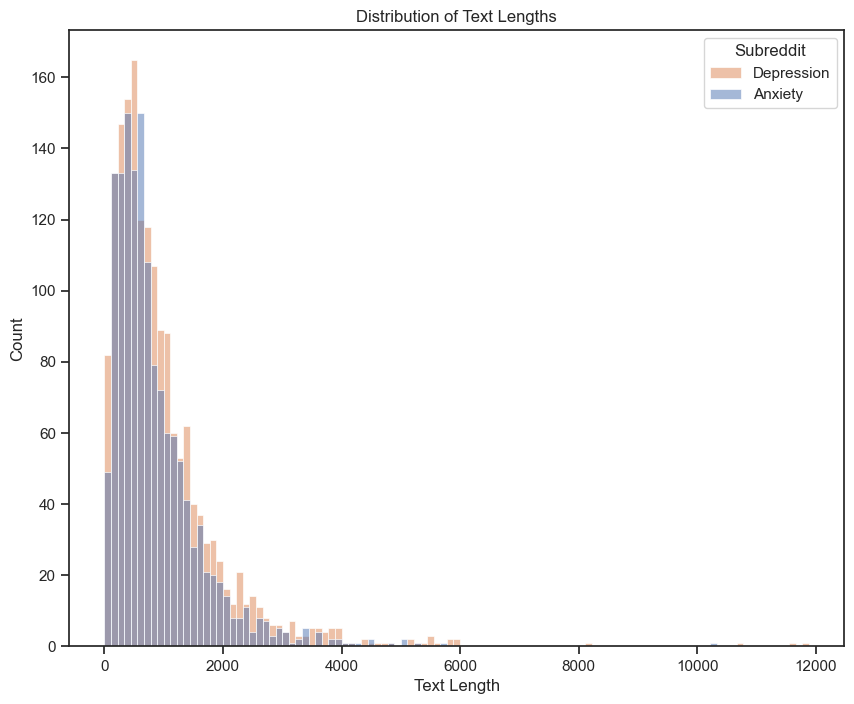

In [25]:
plt.figure(figsize=(10, 8))
sns.set(style="ticks")
sns.histplot(data=df, x="text_length", hue="subreddit")
plt.title("Distribution of Text Lengths")
plt.xlabel("Text Length")
plt.legend(title="Subreddit", labels=["Depression", "Anxiety"])
plt.savefig("../images/combined_text_lengths.png", bbox_inches="tight")

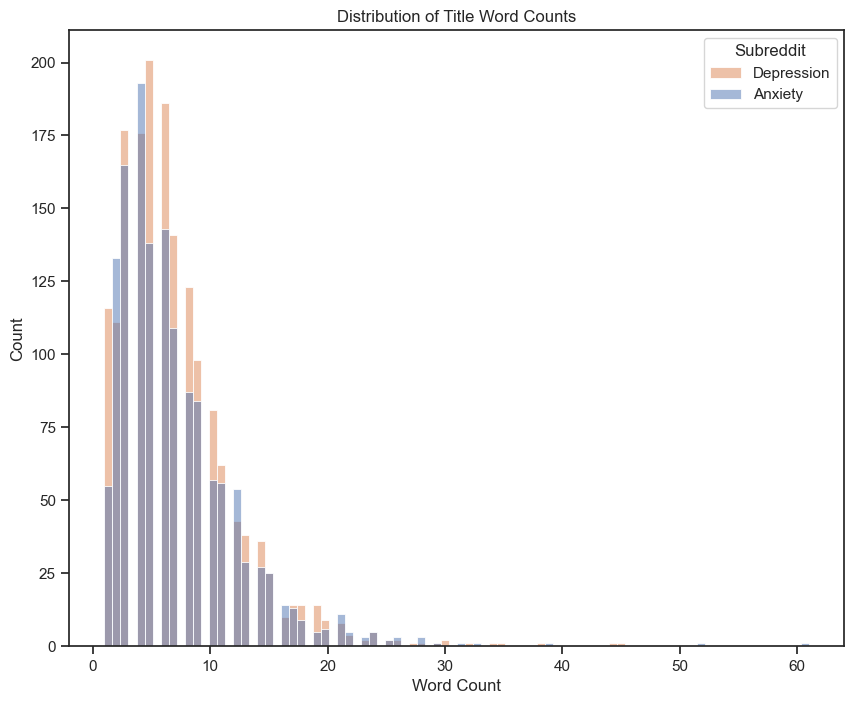

In [26]:
plt.figure(figsize=(10, 8))
sns.set(style="ticks")
sns.histplot(data=df, x="title_word_count", hue="subreddit")
plt.title("Distribution of Title Word Counts")
plt.xlabel("Word Count")
plt.legend(title="Subreddit", labels=["Depression", "Anxiety"])
plt.savefig("../images/combined_title_word_counts.png", bbox_inches="tight")

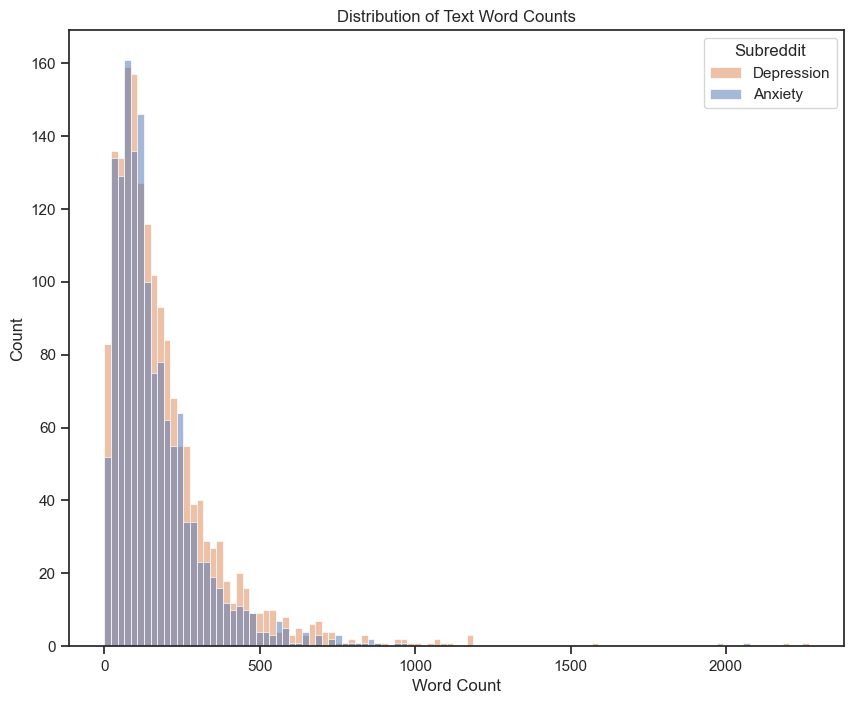

In [27]:
plt.figure(figsize=(10, 8))
sns.set(style="ticks")
sns.histplot(data=df, x="text_word_count", hue="subreddit")
plt.title("Distribution of Text Word Counts")
plt.xlabel("Word Count")
plt.legend(title="Subreddit", labels=["Depression", "Anxiety"])
plt.savefig("../images/combined_text_word_counts.png", bbox_inches="tight")

In [28]:
cvec = CountVectorizer(stop_words="english")

cvec_fit_anxi = cvec.fit_transform(anxi["title"])

column_names = cvec.get_feature_names_out()

cvec_anxi = pd.DataFrame(cvec_fit_anxi.toarray(), columns=column_names)
cvec_anxi.sum().sort_values(ascending=False).head(15)

anxiety     466
help         76
panic        73
feel         71
like         56
feeling      50
just         49
anxious      47
attack       46
health       46
does         44
symptoms     42
heart        40
attacks      35
need         34
dtype: int64

In [29]:
cvec = CountVectorizer(stop_words="english")

cvec_fit_depr = cvec.fit_transform(depr["title"])

column_names = cvec.get_feature_names_out()

cvec_depr = pd.DataFrame(cvec_fit_depr.toarray(), columns=column_names)
cvec_depr.sum().sort_values(ascending=False).head(15)

feel          148
don           127
depression    123
just          102
want           95
life           91
like           81
depressed      76
help           70
know           64
need           53
think          50
feeling        44
im             42
anymore        38
dtype: int64

C:\Users\cowbo\AppData\Local\Temp\ipykernel_80268\3556050935.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(cvec_anxi.sum().nlargest(15), palette="coolwarm")


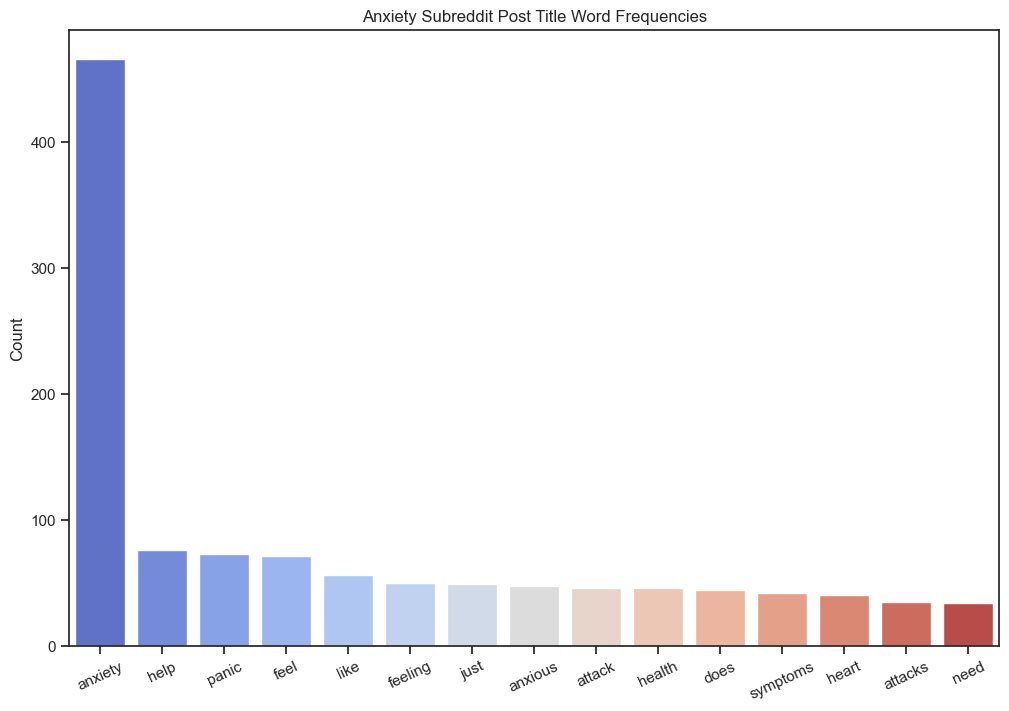

In [30]:
plt.figure(figsize=(12, 8))
sns.set(style="ticks")
sns.barplot(cvec_anxi.sum().nlargest(15), palette="coolwarm")
plt.title("Anxiety Subreddit Post Title Word Frequencies")
plt.ylabel("Count")
plt.xticks(rotation=25)
plt.savefig("../images/anxiety_title_word_frequencies.png", bbox_inches="tight")

C:\Users\cowbo\AppData\Local\Temp\ipykernel_80268\3554091247.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(cvec_depr.sum().nlargest(15), palette="coolwarm")


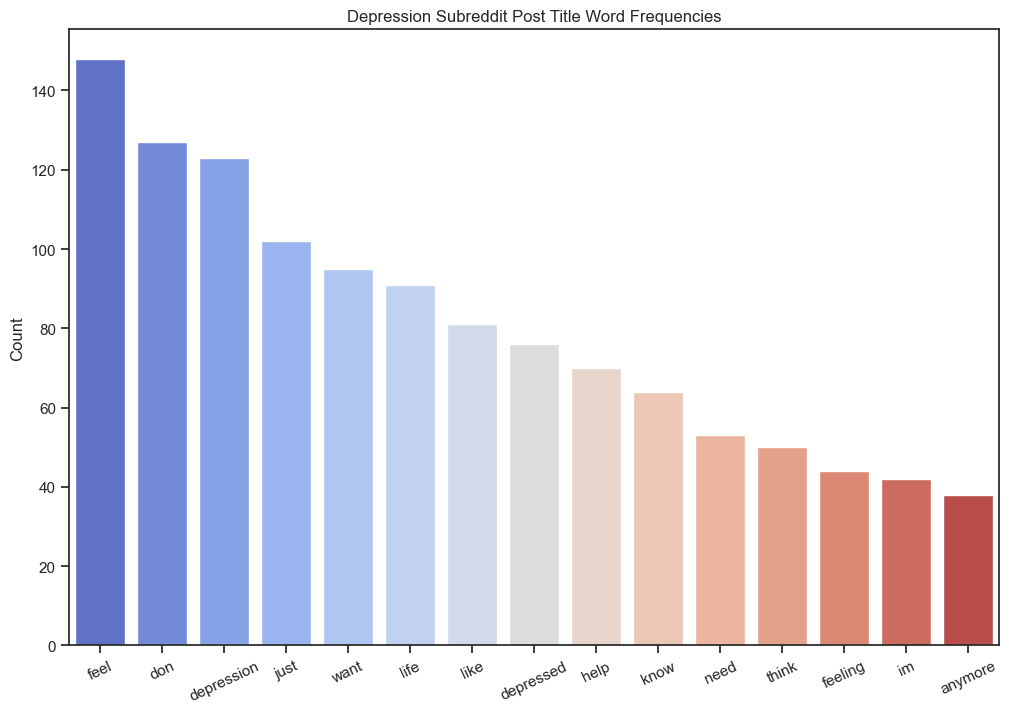

In [31]:
plt.figure(figsize=(12, 8))
sns.set(style="ticks")
sns.barplot(cvec_depr.sum().nlargest(15), palette="coolwarm")
plt.title("Depression Subreddit Post Title Word Frequencies")
plt.ylabel("Count")
plt.xticks(rotation=25)
plt.savefig("../images/depression_title_word_frequencies.png", bbox_inches="tight")

In [32]:
df[df['title'].str.contains('don')].head(3)

,id,subreddit,date,title,text,text_word_count,title_word_count,text_length,title_length
22,191de42,Anxiety,2024-01-08,i dont want to be grounded,"i never heard anyone relate to this, but i really dont want to be grounded. i dont want to stop ...",74,6,383,26
92,1916hdd,Anxiety,2024-01-07,Any good anti anxiety meds that work as good as restoril but don't make you tired?,Restoril works good for me at night and helps me sleep but I need something during the day to he...,26,16,124,82
107,1915dqn,Anxiety,2024-01-07,I don’t know what to do anymore,So I have extreme anxiety all the time with panic attacks. I struggle with DPDR and panic disord...,207,7,1081,31


In [33]:
cvec = CountVectorizer(stop_words="english")

cvec_fit_anxi = cvec.fit_transform(anxi["text"])

column_names = cvec.get_feature_names_out()

cvec_anxi = pd.DataFrame(cvec_fit_anxi.toarray(), columns=column_names)
cvec_anxi.sum().sort_values(ascending=False).head(15)

anxiety    1942
like       1702
just       1535
feel       1187
ve         1087
know        842
don         834
time        708
really      705
panic       554
going       535
feeling     518
day         499
think       463
life        455
dtype: int64

In [34]:
cvec = CountVectorizer(stop_words="english")

cvec_fit_depr = cvec.fit_transform(depr["text"])

column_names = cvec.get_feature_names_out()

cvec_depr = pd.DataFrame(cvec_fit_depr.toarray(), columns=column_names)
cvec_depr.sum().sort_values(ascending=False).head(15)

just       3014
like       2400
feel       2239
don        2232
life       1556
ve         1445
know       1427
want       1392
people     1006
time        935
really      897
think       768
years       752
friends     707
going       656
dtype: int64

C:\Users\cowbo\AppData\Local\Temp\ipykernel_80268\4008707679.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(cvec_anxi.sum().nlargest(15), palette="coolwarm_r")


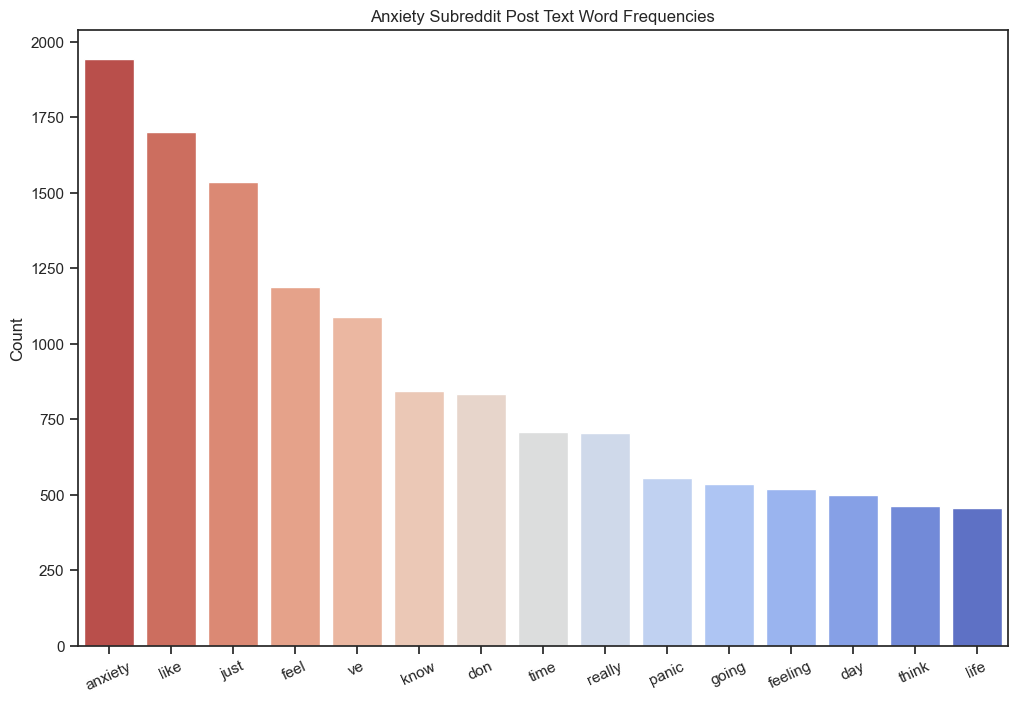

In [35]:
plt.figure(figsize=(12, 8))
sns.set(style="ticks")
sns.barplot(cvec_anxi.sum().nlargest(15), palette="coolwarm_r")
plt.title("Anxiety Subreddit Post Text Word Frequencies")
plt.ylabel("Count")
plt.xticks(rotation=25)
plt.savefig("../images/anxiety_text_word_frequencies.png", bbox_inches="tight")

C:\Users\cowbo\AppData\Local\Temp\ipykernel_80268\1389486640.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(cvec_depr.sum().nlargest(15), palette="coolwarm_r")


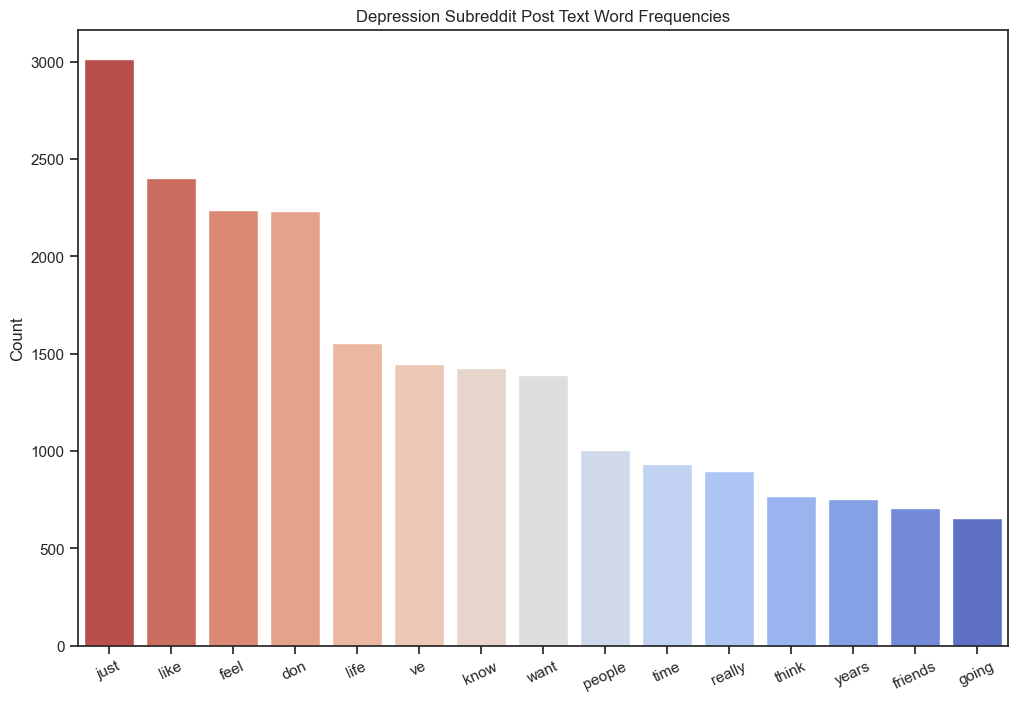

In [36]:
plt.figure(figsize=(12, 8))
sns.set(style="ticks")
sns.barplot(cvec_depr.sum().nlargest(15), palette="coolwarm_r")
plt.title("Depression Subreddit Post Text Word Frequencies")
plt.ylabel("Count")
plt.xticks(rotation=25)
plt.savefig("../images/depression_text_word_frequencies.png", bbox_inches="tight")